#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


array([[29.    ],
       [ 0.9167],
       [ 2.    ],
       ...,
       [26.5   ],
       [27.    ],
       [29.    ]])

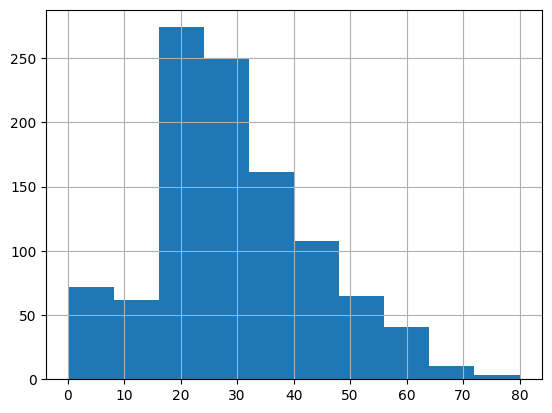

In [31]:
import pandas as pd
titanic = pd.read_csv('./data/titanic.csv')
titanic.info()
#cabin is not important enough to impute; drop
#age IS important; imputing would help
#embarked could go either way; only a couple null rows
#fare is the same
#titanic_clean = titanic[~titanic.embarked.isna()]
titanic_clean = titanic[~titanic.fare.isna()]
# originally was titanic_clean, but that created a new df
# removes null values
titanic_clean = titanic.drop("cabin", axis=1)
# removes column; axis = 1 means it applies to column; axis = 0 means it applies to row
# time to impute into null age rows
titanic.age.hist()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(titanic[["age"]])
# double bracket syntax is important because it returns the column; fit_transform expects you to have a column, not an array (one bracket)
X

<Axes: >

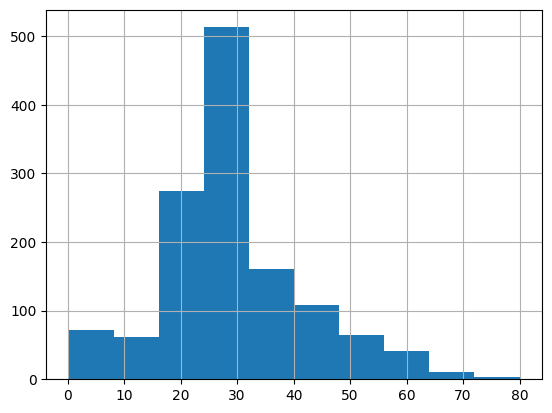

In [32]:

titanic['age']=X[:,0]
# The : means "the entire range (all rows)" 0 means the first column of what you get back    
titanic.age.hist()
# now there's a huge spike at the median (post-imputation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   embarked  1309 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


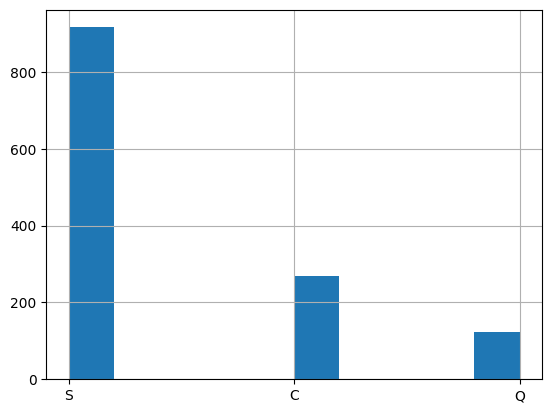

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(titanic[["embarked"]])
titanic_clean['embarked']=X[:,0]
titanic_clean.embarked.hist()
titanic_clean.info()


#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [40]:
# Ordinal encoder works for label encoding (string into number) where the order matters
# One-hot encoder for categorical columns where label encoding doesn't work
    # solves the multi-colinearity problem (apple/pear/banana/grapefruit example)
    # parameter in there is drop=first
    # with a sparse matrix, it's more efficient to encode the position of the 1s

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
#one_hot_encoder = OneHotEncoder()
#titanic['sex'] = one_hot_encoder.fit_transform(titanic['sex'])
titanic_clean = titanic[["sex","age", 'sibsp', 'parch', 'embarked', 'survived']]
# up until this point, all cleaning could be done on the titanic df
# the above line officially moves us into titanic_clean as the df for modeling
ohe = OneHotEncoder(drop="first",sparse_output=False)
X=ohe.fit_transform(titanic_clean[["embarked","sex"]])
X
ohe.get_feature_names_out()
titanic_clean[ohe.get_feature_names_out()]=X

titanic_clean = titanic_clean.drop(["sex","embarked"], axis=1)
titanic_clean


/tmp/ipykernel_17325/3617499155.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean[ohe.get_feature_names_out()]=X
/tmp/ipykernel_17325/3617499155.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean[ohe.get_feature_names_out()]=X
/tmp/ipykernel_17325/3617499155.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,age,sibsp,parch,survived,embarked_Q,embarked_S,embarked_nan,sex_male
0,29.0000,0,0,1,0.0,1.0,0.0,0.0
1,0.9167,1,2,1,0.0,1.0,0.0,1.0
2,2.0000,1,2,0,0.0,1.0,0.0,0.0
3,30.0000,1,2,0,0.0,1.0,0.0,1.0
4,25.0000,1,2,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1304,14.5000,1,0,0,0.0,0.0,0.0,0.0
1305,28.0000,1,0,0,0.0,0.0,0.0,0.0
1306,26.5000,0,0,0,0.0,0.0,0.0,1.0
1307,27.0000,0,0,0,0.0,0.0,0.0,1.0


#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression()
X = titanic_clean.drop("survived",axis=1)
y = titanic_clean["survived"]

result = cross_val_score(lr, X, y, cv=5)
result

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.82061069, 0.8129771 , 0.80534351, 0.70992366, 0.65900383])

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.tree import DecisionTreeClassifier

lr = DecisionTreeClassifier()
X = titanic_clean.drop("survived",axis=1)
y = titanic_clean["survived"]

result = cross_val_score(lr, X, y, cv=5)
result

array([0.70610687, 0.74427481, 0.73664122, 0.73282443, 0.63601533])

#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?